# CFL on Galaxy Dataset 
This notebook runs CFL on the galaxy dataset and visualizes the results. X data is comprised of two input images (a gas map and dark matter map). Y data is comprised of six parameters describing the simulated telescope image that results from these input maps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

cfl_path = '/Users/iwahle/Desktop/cfl'
sys.path.append(cfl_path)
import cfl
from cfl.cfl_wrapper import make_CFL
from cfl.save.experiment_saver import ExperimentSaver
from cfl.dataset import Dataset

# Load and Inspect Dataset

In [2]:
# load data
X = np.load(os.path.join(cfl_path, 'data/galaxies/X.npy'))
Y = np.load(os.path.join(cfl_path, 'data/galaxies/Y.npy'))
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (8643, 5202)
Y shape:  (8643, 6)


min img 0:  -111209.03876876831
max img 0:  0.0

min img 1:  0.0
max img 1:  73430.0


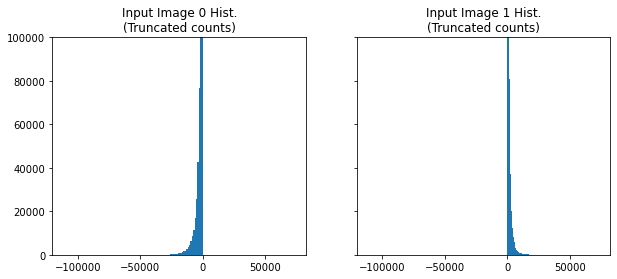

In [3]:
print('min img 0: ', np.min(X[:,:2601]))
print('max img 0: ', np.max(X[:,:2601]))
print()
print('min img 1: ', np.min(X[:,2601:]))
print('max img 1: ', np.max(X[:,2601:]))
fig,ax = plt.subplots(1,2,figsize=(10,4), sharex=True, sharey=True)
ax[0].hist(np.ravel(X[:,:2601]),100)
ax[0].set_title('Input Image 0 Hist.\n(Truncated counts)')
ax[1].hist(np.ravel(X[:,2601:]),100)
ax[1].set_title('Input Image 1 Hist.\n(Truncated counts)')
plt.ylim(0,1e5)
plt.show()


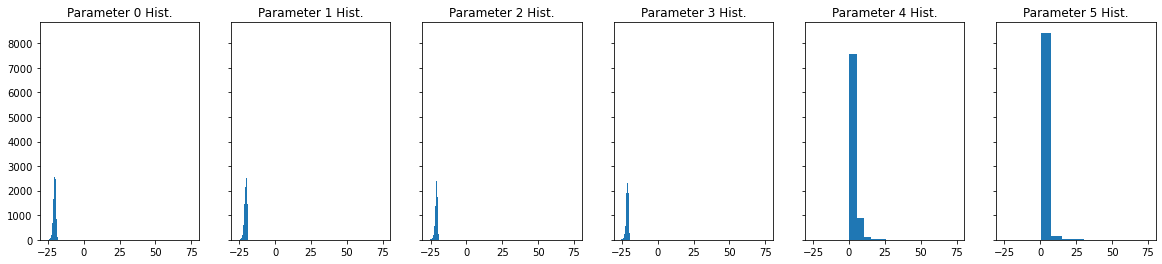

In [4]:
fig,ax = plt.subplots(1,6,figsize=(20,4), sharex=True, sharey=True)
for i in range(6):
    ax[i].hist(Y[:,i],10)
    ax[i].set_title('Parameter {} Hist.'.format(i))
plt.show()


# Rescale Data

In [5]:
# X data should be arcsinhed
X = np.arcsinh(X)
X = X - X.min(axis=0)
X = X / X.max(axis=0)

# Y should be z-scored
Y = Y - Y.mean(axis=0)
Y = Y / Y.std(axis=0)

min img 0:  0.0
max img 0:  1.0

min img 1:  0.0
max img 1:  1.0


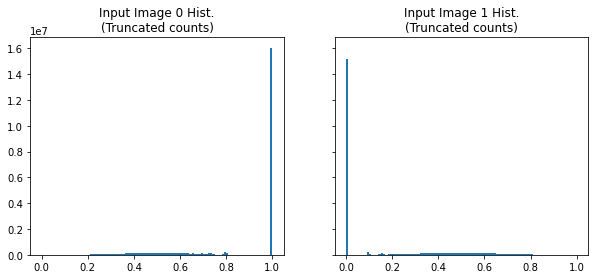

In [6]:
print('min img 0: ', np.min(X[:,:2601]))
print('max img 0: ', np.max(X[:,:2601]))
print()
print('min img 1: ', np.min(X[:,2601:]))
print('max img 1: ', np.max(X[:,2601:]))
fig,ax = plt.subplots(1,2,figsize=(10,4), sharex=True, sharey=True)
ax[0].hist(np.ravel(X[:,:2601]),100)
ax[0].set_title('Input Image 0 Hist.\n(Truncated counts)')
ax[1].hist(np.ravel(X[:,2601:]),100)
ax[1].set_title('Input Image 1 Hist.\n(Truncated counts)')
# plt.ylim(0,1e5)
plt.show()


param 0 min: -5.084923879152289, max: 2.6816166006810707
param 1 min: -4.835309458724446, max: 2.3333343493773886
param 2 min: -4.71837822619073, max: 2.1926626890132592
param 3 min: -4.648840457422656, max: 2.1117426606850382
param 4 min: -1.1953675147308491, max: 17.887880401785317
param 5 min: -0.36990860551779914, max: 22.570458850880186


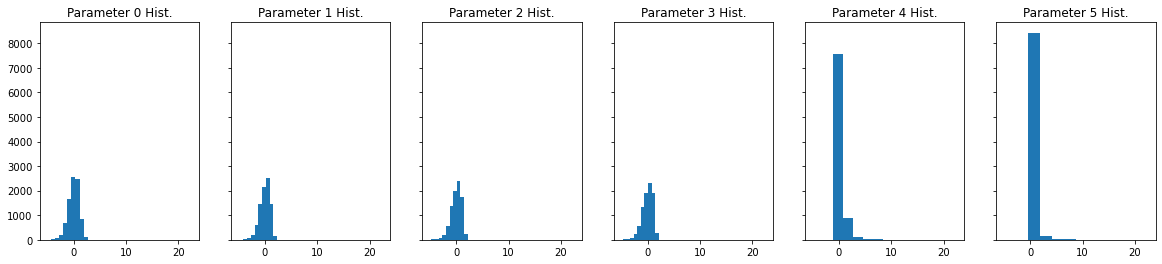

In [7]:
fig,ax = plt.subplots(1,6,figsize=(20,4), sharex=True, sharey=True)
for i in range(6):
    ax[i].hist(Y[:,i],10)
    ax[i].set_title('Parameter {} Hist.'.format(i))
    print('param {} min: {}, max: {}'.format(i, np.min(Y[:,i]),np.max(Y[:,i])))
plt.show()


# Run CFL

In [8]:
# start experiment
experiment_saver = ExperimentSaver('results/galaxies')

# register dataset
dataset0 = Dataset(X, Y, dataset_label='dataset0', experiment_saver=experiment_saver)

All results from this run will be saved to results/galaxies/experiment0008


In [9]:
# specify CFL parameters

# generic data parameters
data_info = { 'X_dims' : X.shape, 
              'Y_dims' : Y.shape } 

# conditional density estimator parameters
CDE_params = { 'batch_size'  : 64,
               'optimizer'   : 'adam',
               'n_epochs'    : 150,
               'verbose'     : 1,
               'opt_config'  : {'lr': 1e-4},
               'dense_units' : [1000, 100, data_info['Y_dims'][1]],
               'activations' : ['relu', 'relu', 'linear'],
               'dropouts'    : [0.1, 0.1, 0], 
               'show_plot'   : True }

    
# clusterer parameters
cluster_params = { 'n_Xclusters' : 4, 
                   'n_Yclusters' : 4 }

In [10]:
# build CFL object! 
cfl_object = make_CFL(  data_info=data_info, 
                        CDE_type='CondExpMod', 
                        cluster_type='Kmeans', 
                        CDE_params=CDE_params, 
                        cluster_params=cluster_params,
                        experiment_saver=experiment_saver) 

weights_path not specified in params, defaulting to None
loss not specified in params, defaulting to mean_squared_error
model_name not specified in params, defaulting to CondExpMod


Epoch 1/150
102/102 [==============================] - 2s 17ms/step - loss: 0.5330 - val_loss: 0.4391
Epoch 2/150
102/102 [==============================] - 2s 15ms/step - loss: 0.4456 - val_loss: 0.4116
Epoch 3/150
102/102 [==============================] - 2s 15ms/step - loss: 0.4291 - val_loss: 0.3879
Epoch 4/150
102/102 [==============================] - 2s 16ms/step - loss: 0.4166 - val_loss: 0.3803
Epoch 5/150
102/102 [==============================] - 2s 15ms/step - loss: 0.4030 - val_loss: 0.3769
Epoch 6/150
102/102 [==============================] - 2s 15ms/step - loss: 0.3969 - val_loss: 0.3613
Epoch 7/150
102/102 [==============================] - 1s 13ms/step - loss: 0.3934 - val_loss: 0.3746
Epoch 8/150
102/102 [==============================] - 1s 14ms/step - loss: 0.3906 - val_loss: 0.3701
Epoch 9/150
102/102 [==============================] - 1s 14ms/step - loss: 0.3869 - val_loss: 0.3671
Epoch 10/150
102/102 [==============================] - 2s 16ms/step - loss: 0.376

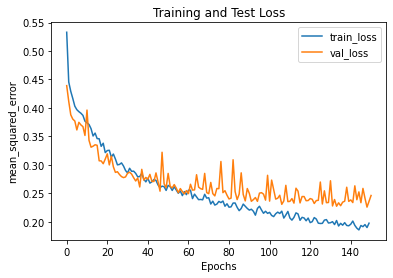

Loading parameters from  results/galaxies/experiment0008/dataset0/checkpoints/best_weights
100%|██████████| 8643/8643 [00:05<00:00, 1460.16it/s]


In [11]:
# train
train_results = cfl_object.train(dataset0, standardize=False)

In [12]:
# predict
dataset1 = Dataset(X[:,:], Y[:,:], dataset_label='dataset1', experiment_saver=experiment_saver) 
xlbls,ylbls = cfl_object.predict(dataset1)


100%|██████████| 8643/8643 [00:05<00:00, 1441.49it/s]


# Visualization

In [13]:
def reshape_input(vec, im_no):
    if im_no==0:
        return np.reshape(vec[:2601],(51,51))
    elif im_no==1:
        return np.reshape(vec[2601:],(51,51))
    elif im_no==2:
        return np.hstack([np.reshape(vec[:2601],(51,51)), np.reshape(vec[2601:],(51,51))])
    else:
        return

Examples of Input Image 0 by Class


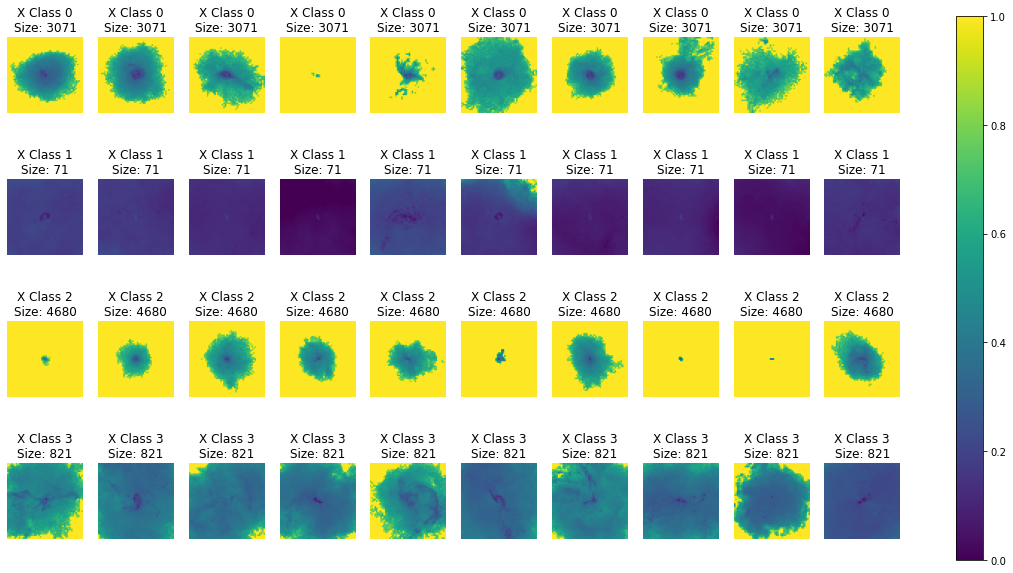

In [14]:
print('Examples of Input Image 0 by Class')
fig,ax = plt.subplots(cluster_params['n_Xclusters'], 10, figsize=(20,10))
figmin = np.min(dataset1.X[:,:2601])
figmax = np.max(dataset1.X[:,:2601])
for i in range(cluster_params['n_Xclusters']):
    class_idx = np.where(xlbls==i)[0]
    class_samples = np.random.choice(class_idx, 10)
    for j in range(10):
        im = ax[i,j].imshow(reshape_input(dataset1.X[class_samples[j]],0), vmin=figmin, vmax=figmax)
        ax[i,j].set_title('class {}'.format(i))
        ax[i,j].axis('off')
        ax[i,j].set_title('X Class {}\nSize: {}'.format(i, np.sum(xlbls==i)))
fig.colorbar(im, ax=ax)
plt.show()


Examples of Input Image 1 by Class


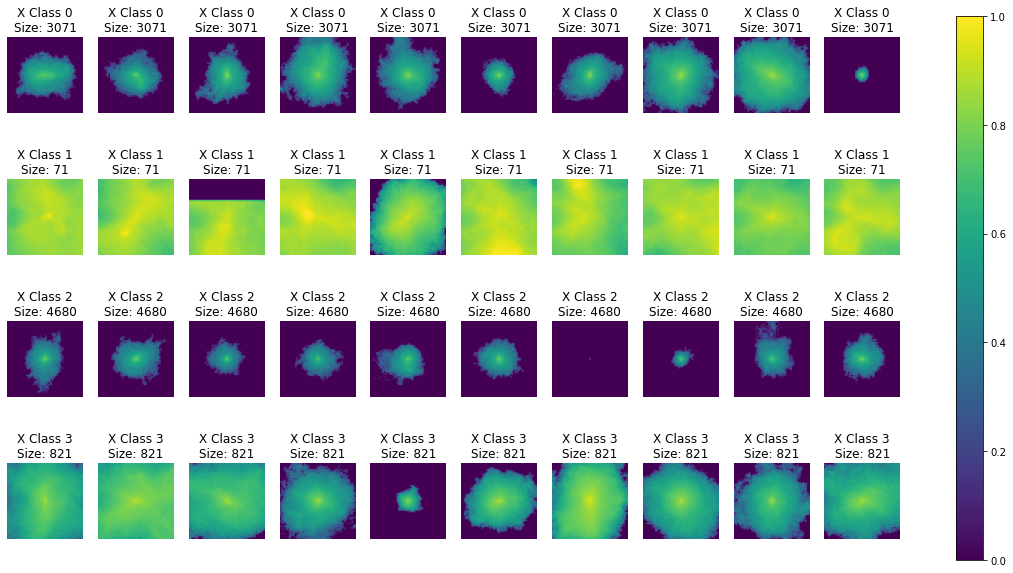

In [15]:
print('Examples of Input Image 1 by Class')
fig,ax = plt.subplots(cluster_params['n_Xclusters'], 10, figsize=(20,10))
figmin = np.min(dataset1.X[:,2601:])
figmax = np.max(dataset1.X[:,2601:])
for i in range(cluster_params['n_Xclusters']):
    class_idx = np.where(xlbls==i)[0]
    class_samples = np.random.choice(class_idx, 10)
    for j in range(10):
        ax[i,j].imshow(reshape_input(dataset1.X[class_samples[j]],1),vmin=figmin, vmax=figmax)
        ax[i,j].set_title('class {}'.format(i))
        ax[i,j].axis('off')
        ax[i,j].set_title('X Class {}\nSize: {}'.format(i, np.sum(xlbls==i)))
fig.colorbar(im, ax=ax)
plt.show()


# Plot Average Radial Profile

In [60]:
def calculate_arp(image): # arp = average radial profile = average 
    # source: https://stackoverflow.com/questions/48842320/what-is-the-best-way-to-calculate-radial-average-of-the-image-with-pythonf
    # create array of radii
    x,y = np.meshgrid(np.arange(image.shape[1]),np.arange(image.shape[0]))
    x0 = image.shape[1]//2
    y0 = image.shape[0]//2
    R = np.sqrt((x-x0)**2+(y-y0)**2)
    
    # calculate the mean
    eps = 0.5
    f = lambda r : image[(R >= r-eps) & (R < r+eps)].mean()
    r  = np.linspace(0.1,100,num=300)
    mean = np.vectorize(f)(r)

    return r,mean

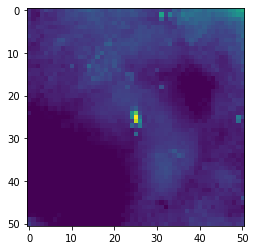

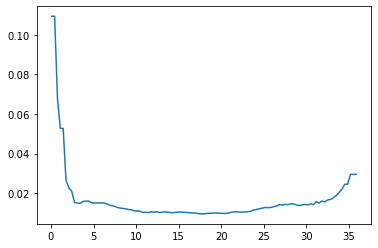

In [61]:
tmp_image = X[0,:2601].reshape((51,51))
plt.imshow(tmp_image)
plt.show()
r, mean = calculate_arp(tmp_image)
plt.plot(r, mean)
plt.show()

Examples of Input Image 0 by Class


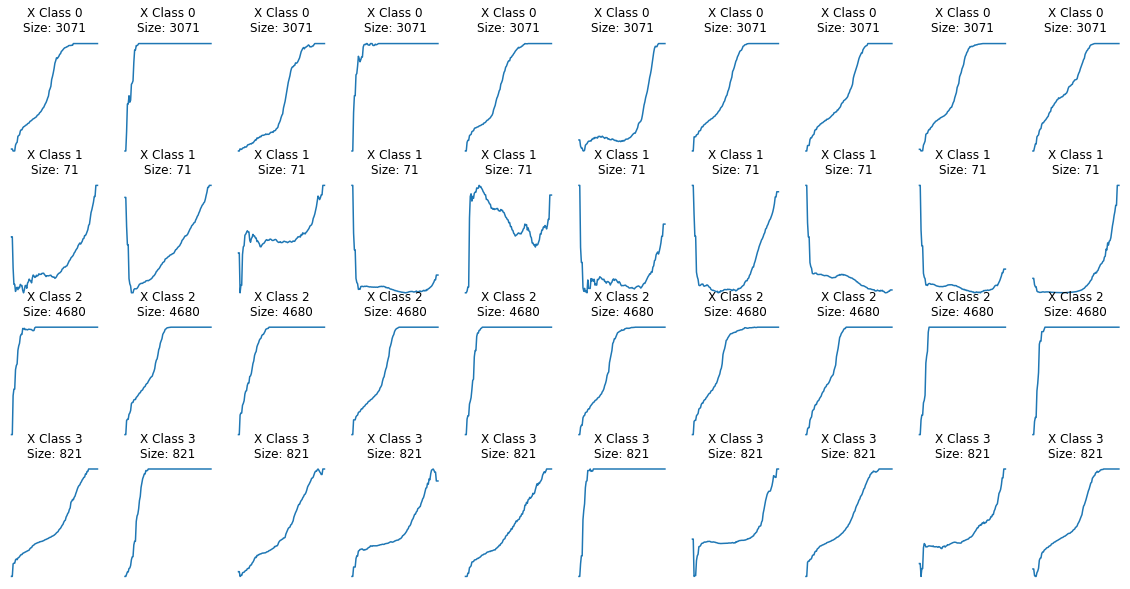

In [63]:
print('Examples of Input Image 0 by Class')
fig,ax = plt.subplots(cluster_params['n_Xclusters'], 10, figsize=(20,10))
figmin = np.min(dataset1.X[:,:2601])
figmax = np.max(dataset1.X[:,:2601])
for i in range(cluster_params['n_Xclusters']):
    class_idx = np.where(xlbls==i)[0]
    class_samples = np.random.choice(class_idx, 10)
    for j in range(10):
        r, mean = calculate_arp(reshape_input(dataset1.X[class_samples[j]],0))
        im = ax[i,j].plot(r, mean)
        ax[i,j].set_title('class {}'.format(i))
        ax[i,j].axis('off')
        ax[i,j].set_title('X Class {}\nSize: {}'.format(i, np.sum(xlbls==i)))
plt.show()


In [67]:
print('Examples of Input Image 0 by Class')
fig,ax = plt.subplots(cluster_params['n_Xclusters'], 1, figsize=(5,10))
figmin = np.min(dataset1.X[:,:2601])
figmax = np.max(dataset1.X[:,:2601])
for i in range(cluster_params['n_Xclusters']):
    class_idx = np.where(xlbls==i)[0]
    class_samples = np.random.choice(class_idx, 100)
    means = np.zeros((100,300))
    for j in range(100):
        r, mean = calculate_arp(reshape_input(dataset1.X[class_samples[j]],0))
        means[j] = mean
        im = ax[i].plot(r, mean, c='gray')
    ax[i].plot(r, means.mean(axis=0), c='gray')
    ax[i].set_title('class {}'.format(i))
    ax[i].axis('off')
    ax[i].set_title('X Class {}\nSize: {}'.format(i, np.sum(xlbls==i)))
plt.show()


Examples of Input Image 0 by Class


AttributeError: 'list' object has no attribute 'mean'

In [68]:
len(r)

300